In [3]:
!pip install pandas-datareader

In [1]:
#import the libraries
import math
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense,LSTM,Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [2]:
import pandas_datareader.data as web
from datetime import datetime

#set the starting and end date of  data
start_date = datetime(2010, 1, 1)
end_date = datetime(2024, 10, 10)

#Load the data from yahoo finance
stock_data = web.DataReader('AAPL', 'stooq', start=start_date, end=end_date)

#print first and last five columns of the dataset
print("Latest data\n")
print(stock_data.head(5),"\n")
print("Last data\n")
print(stock_data.tail(5))
# Get the number of rows and columns in the dataset
print(stock_data.shape)

Latest data

              Open    High     Low   Close      Volume
Date                                                  
2024-10-10  227.78  229.50  227.17  229.04  28183544.0
2024-10-09  225.23  229.75  224.83  229.54  33591091.0
2024-10-08  224.30  225.98  223.25  225.77  31855693.0
2024-10-07  224.50  225.69  221.33  221.69  39505354.0
2024-10-04  227.90  228.00  224.13  226.80  37345098.0 

Last data

               Open     High      Low    Close        Volume
Date                                                        
2010-01-08  6.34617  6.39407  6.30527  6.39387  5.296205e+08
2010-01-07  6.38439  6.39407  6.30478  6.35113  5.641458e+08
2010-01-06  6.46558  6.49137  6.35574  6.36237  6.513684e+08
2010-01-05  6.47811  6.50241  6.43181  6.46558  7.121486e+08
2010-01-04  6.43902  6.46922  6.40573  6.45451  5.819111e+08
(3718, 5)


In [3]:
#Data preprocessing
#Find the missing values in the dataset
print("Total missing Values in the stock market dataset:",stock_data.isna().sum().sum())
#find the Duplicate data in the dataset
print("No.of duplicate in train datasets:",end=" ")
print(stock_data.duplicated().sum())

Total missing Values in the stock market dataset: 0
No.of duplicate in train datasets: 0


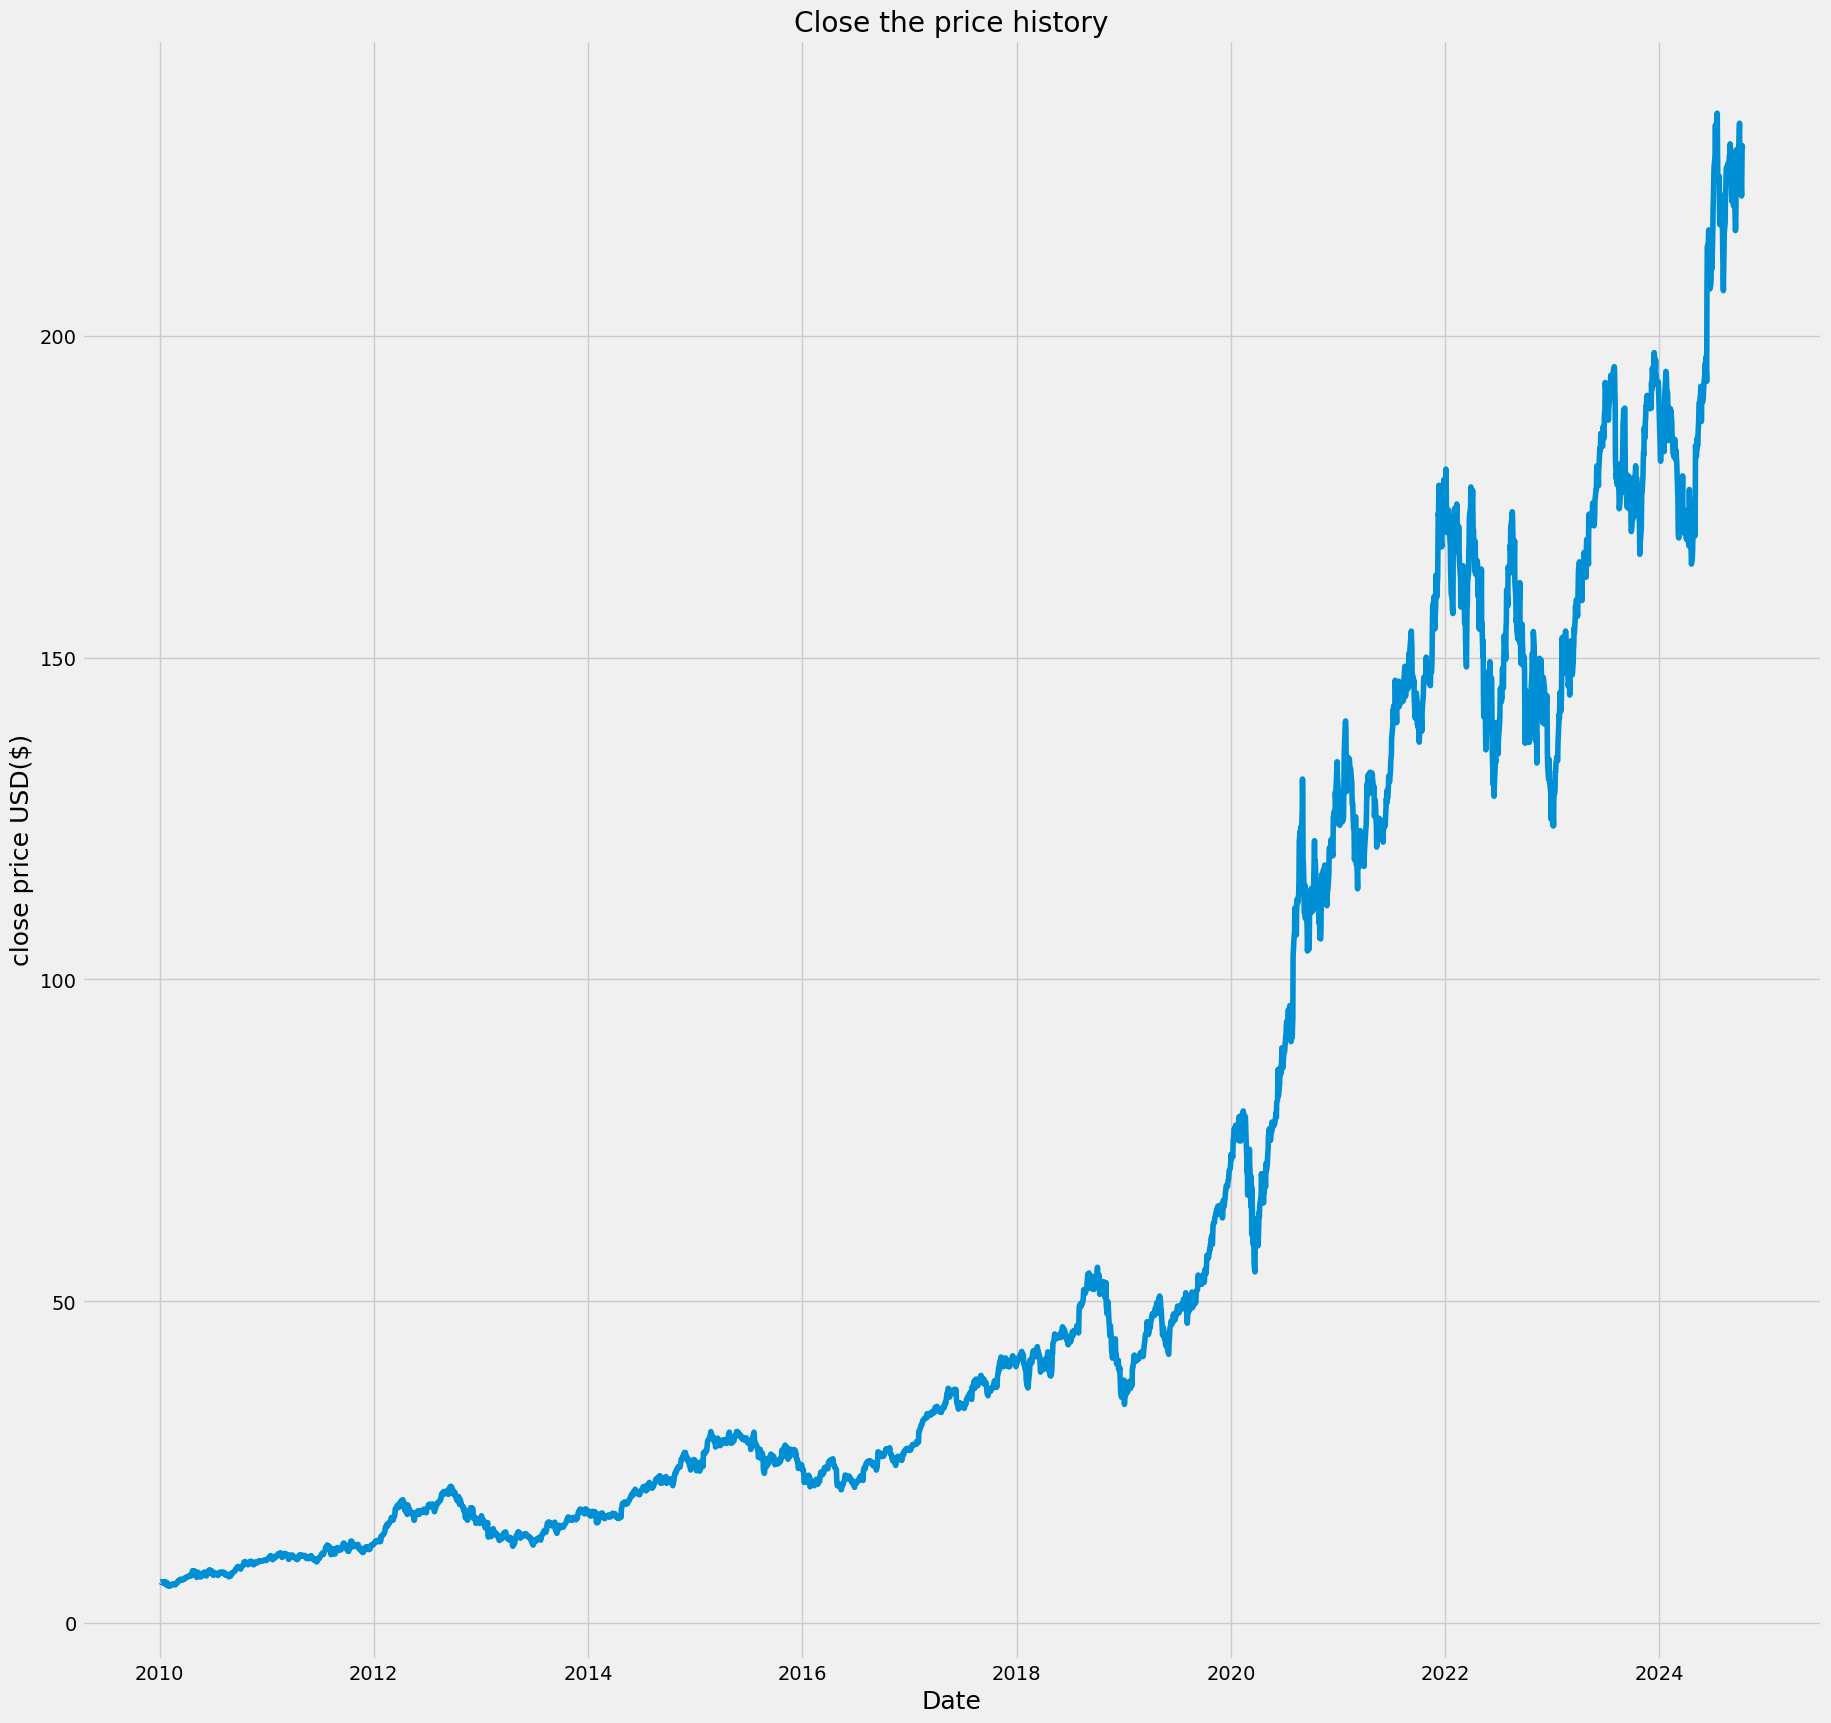

In [4]:
#visualize the closing price history
plt.figure(figsize=(20,20))
plt.title("Close the price history")
plt.plot(stock_data.index,stock_data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("close price USD($)",fontsize=18)
plt.show()

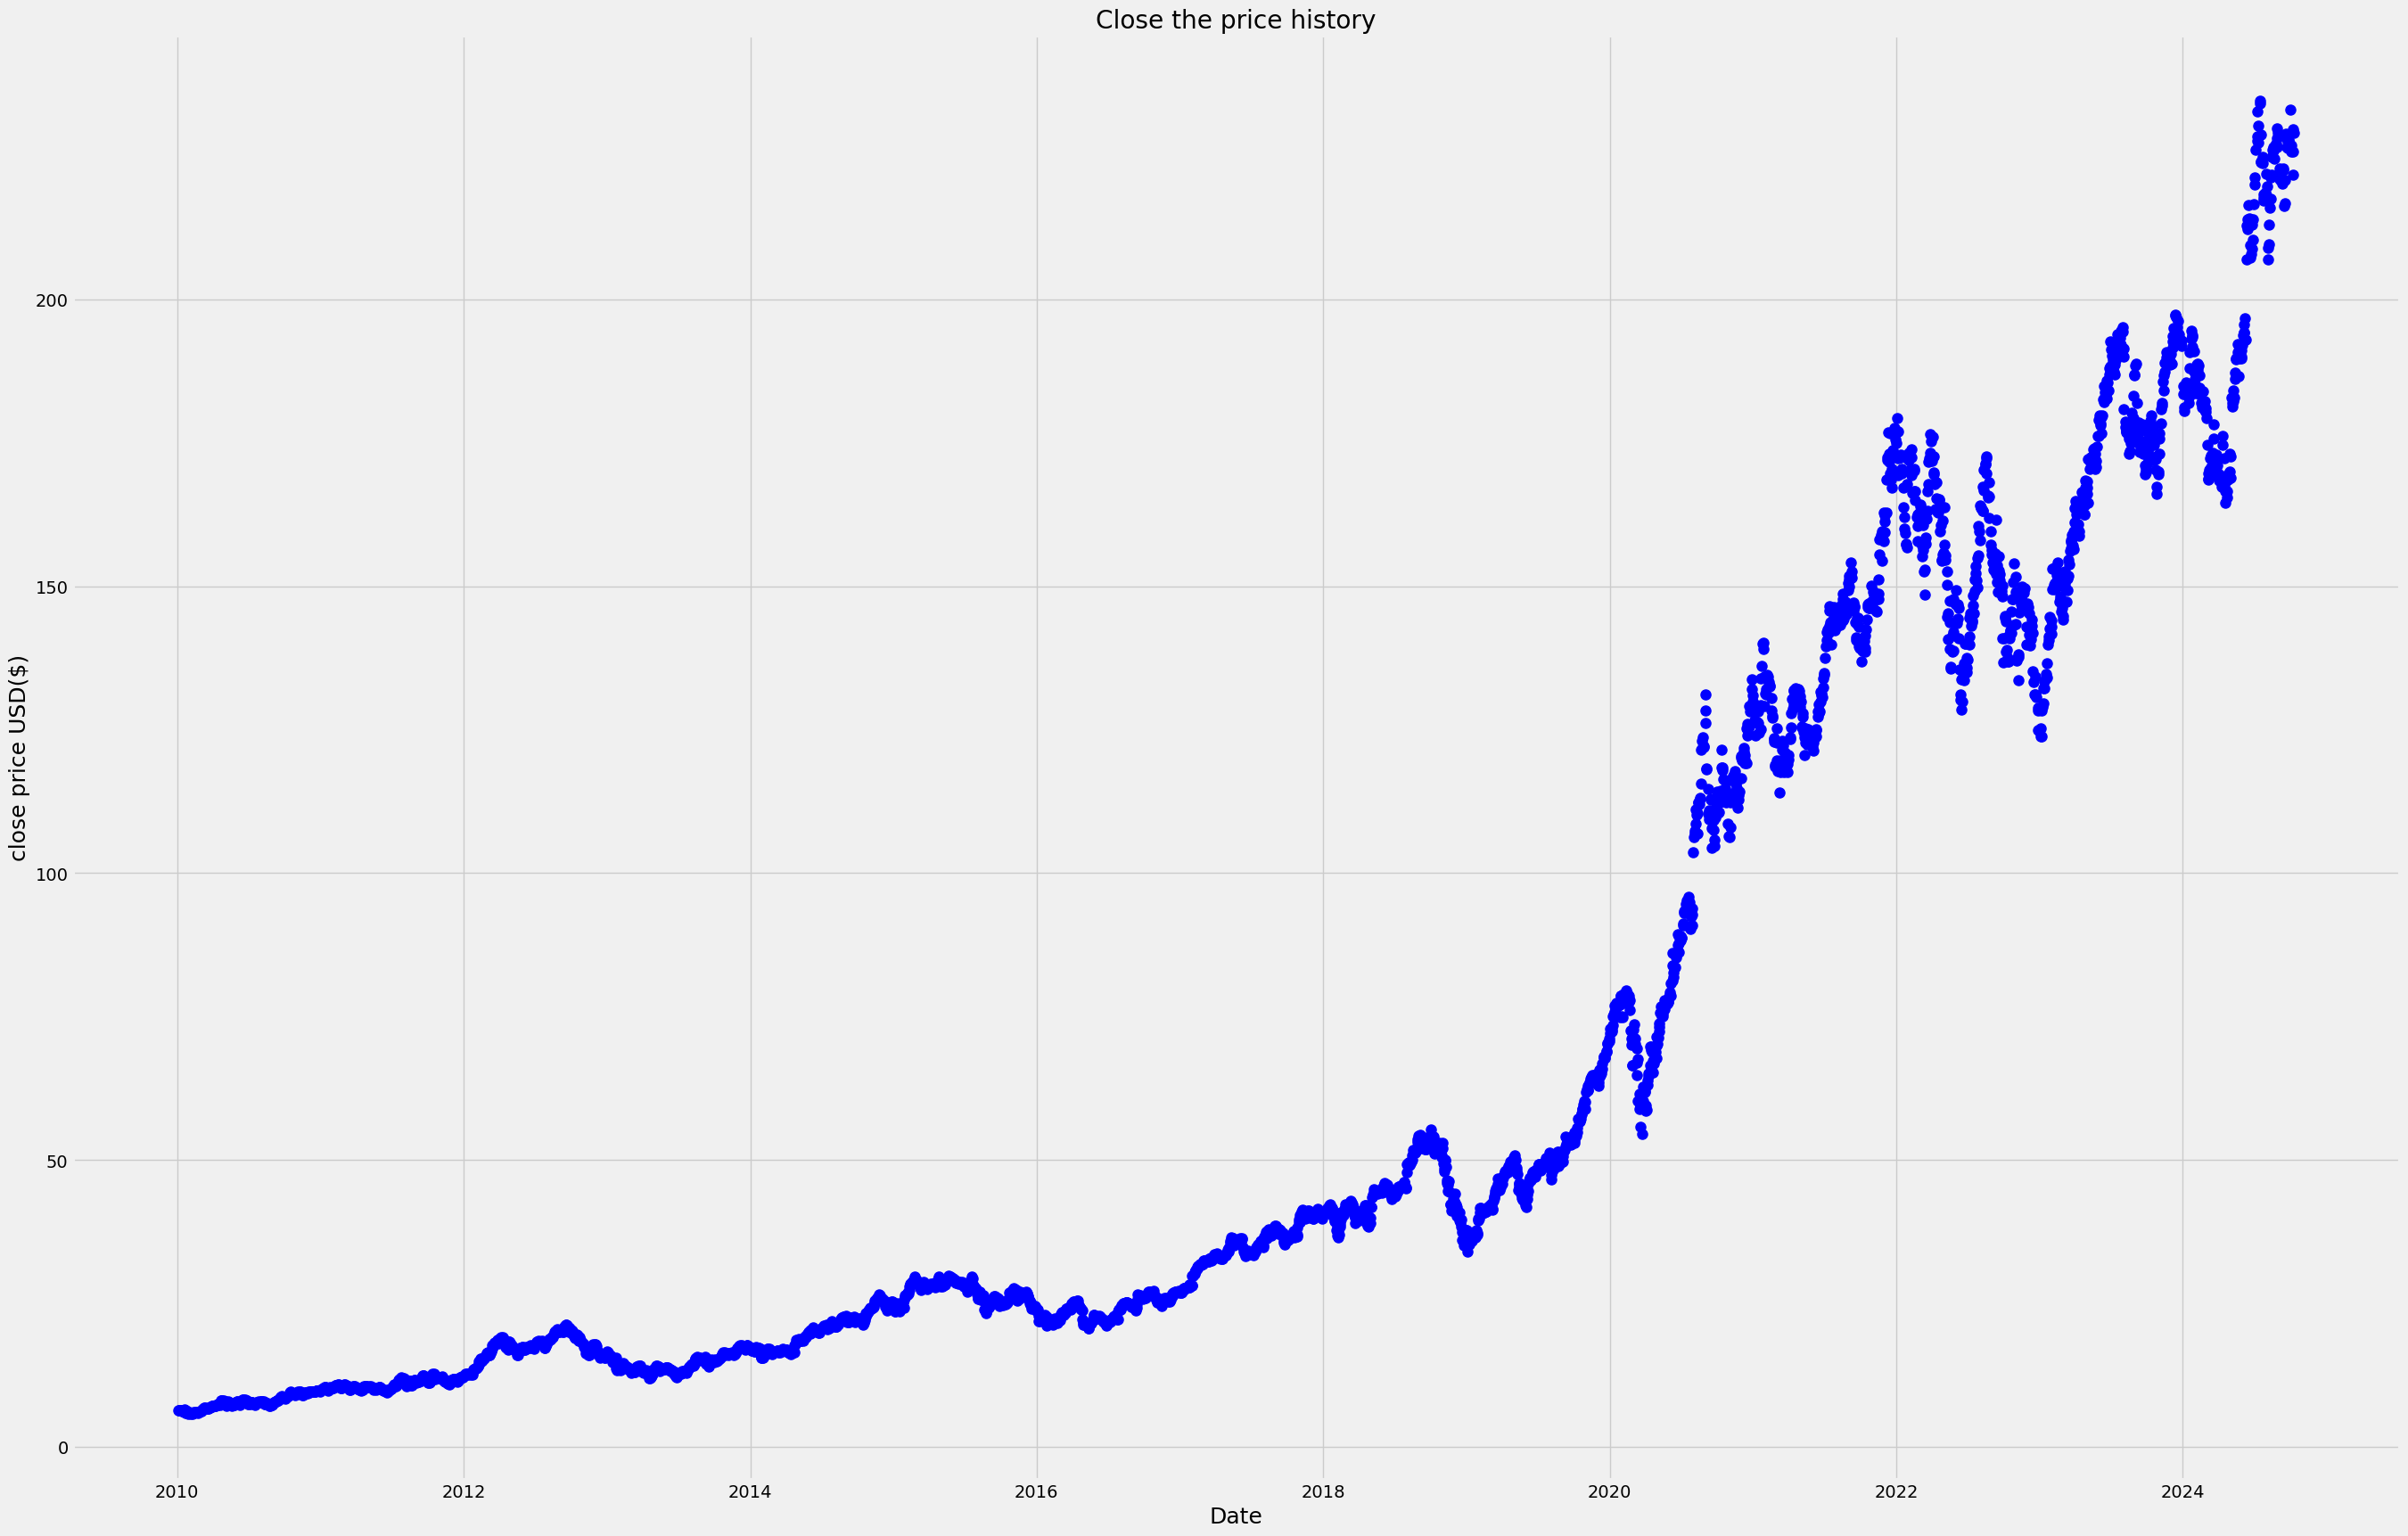

In [9]:
#visualize the closing price history using(bo="blue circle marker")
plt.figure(figsize=(30,20))
plt.title("Close the price history")
plt.plot(stock_data.index,stock_data["Close"],"bo",markersize=8,linewidth=1)
plt.xlabel("Date", fontsize=18)
plt.ylabel("close price USD($)",fontsize=18)
plt.show()

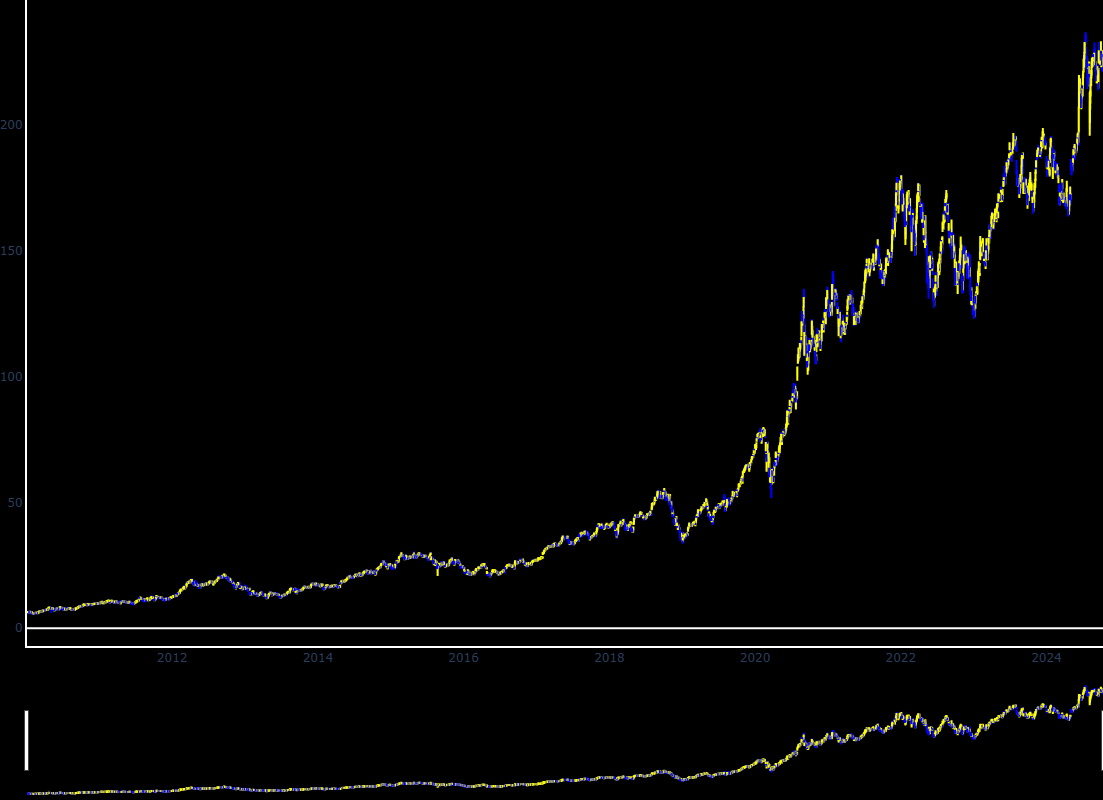

In [11]:
#visualize data using candlestick
import plotly.graph_objects as go
fig=go.Figure(data=go.Candlestick(x=stock_data.index,open=stock_data["Open"],
                                  high=stock_data["High"],
                                  low=stock_data["Low"],
                                  close=stock_data["Close"],
                                 increasing_line_color="yellow",decreasing_line_color="blue"))
#set the background color
fig.update_layout(paper_bgcolor="black",plot_bgcolor="black",margin_l=0,margin_b=0,margin_r=0,margin_t=0,height=800)
fig.update_xaxes(showline=True,linewidth=2,linecolor="white",gridcolor="black")
fig.update_yaxes(showline=True,linewidth=2,linecolor="white",gridcolor="black")
fig.show()
#Yellow color-Indicates Increasing values in the dataset stock market
#Blue color-Indicates Decreasing values in the dataset stock market


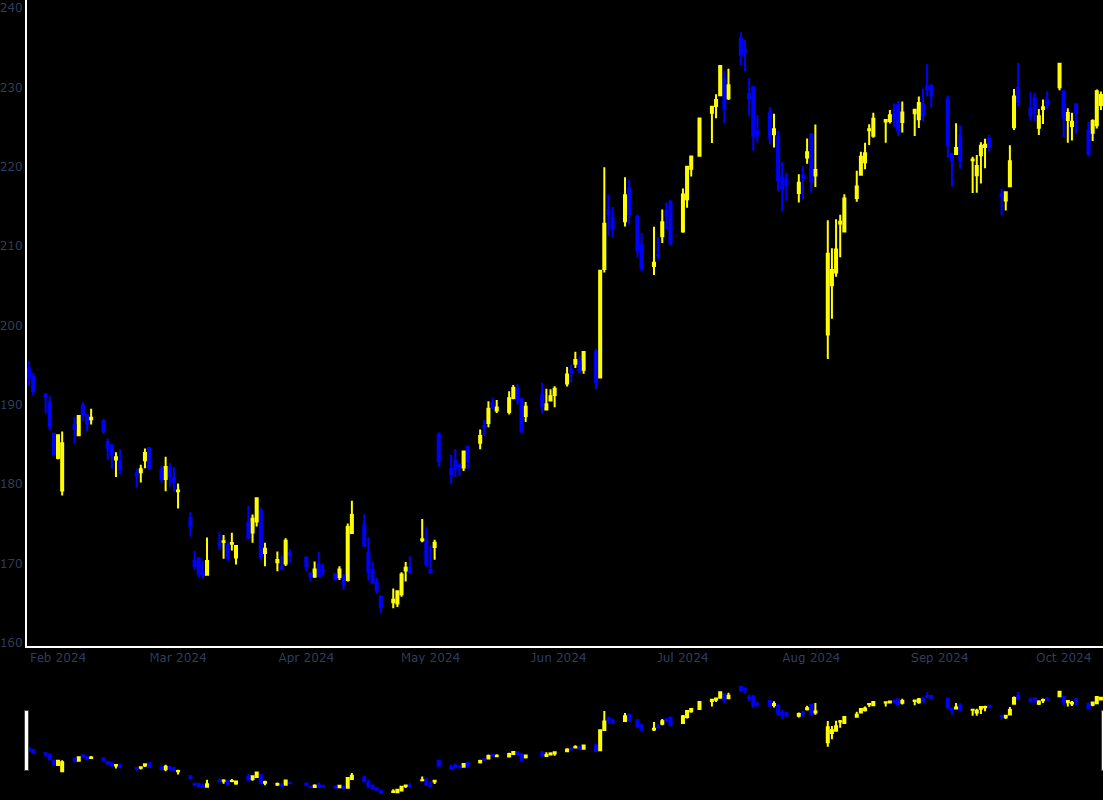

In [13]:
#visualize data using candlestick last six month of data
stock_data1=stock_data[0:180]   #fetch the data for last six months

fig=go.Figure(data=go.Candlestick(x=stock_data1.index,open=stock_data1["Open"],
                                  high=stock_data1["High"],
                                  low=stock_data1["Low"],
                                  close=stock_data1["Close"],
                                 increasing_line_color="yellow",decreasing_line_color="blue"))
#set the background color
fig.update_layout(paper_bgcolor="black",plot_bgcolor="black",margin_l=0,margin_b=0,margin_r=0,margin_t=0,height=800)
fig.update_xaxes(showline=True,linewidth=2,linecolor="white",gridcolor="black")
fig.update_yaxes(showline=True,linewidth=2,linecolor="white",gridcolor="black")
fig.show()
#Yellow color-Indicates Increasing values in the last six month stock market
#Blue color-Indicates Decreasing values in the last six month stock market
#you can use the slider to zoom the data values


In [15]:
#create support and resistances
supports=stock_data1[stock_data1.Low==stock_data1.Low.rolling(5,center=True).min()].Low
resistances=stock_data1[stock_data1.High==stock_data1.High.rolling(5,center=True).min()].High
levels=pd.concat([supports,resistances])


In [17]:

levels=levels[abs(levels.diff())>25]
#support-low level line- Buyer tend to purchase the stock
#Resistance-High level line -Trader sell the stocks- take the profit rather than risk the price falling back.

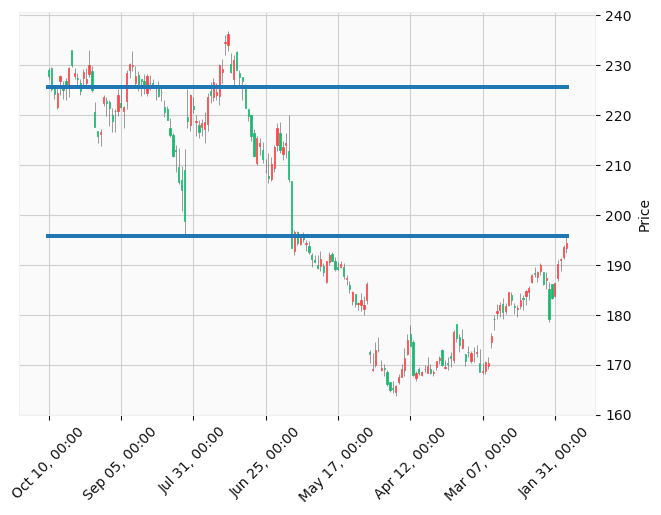

In [19]:
import mplfinance as mpf  # pip nstall mplfinance
mpf.plot(stock_data1,type="candle",hlines=levels.to_list(),style="yahoo")


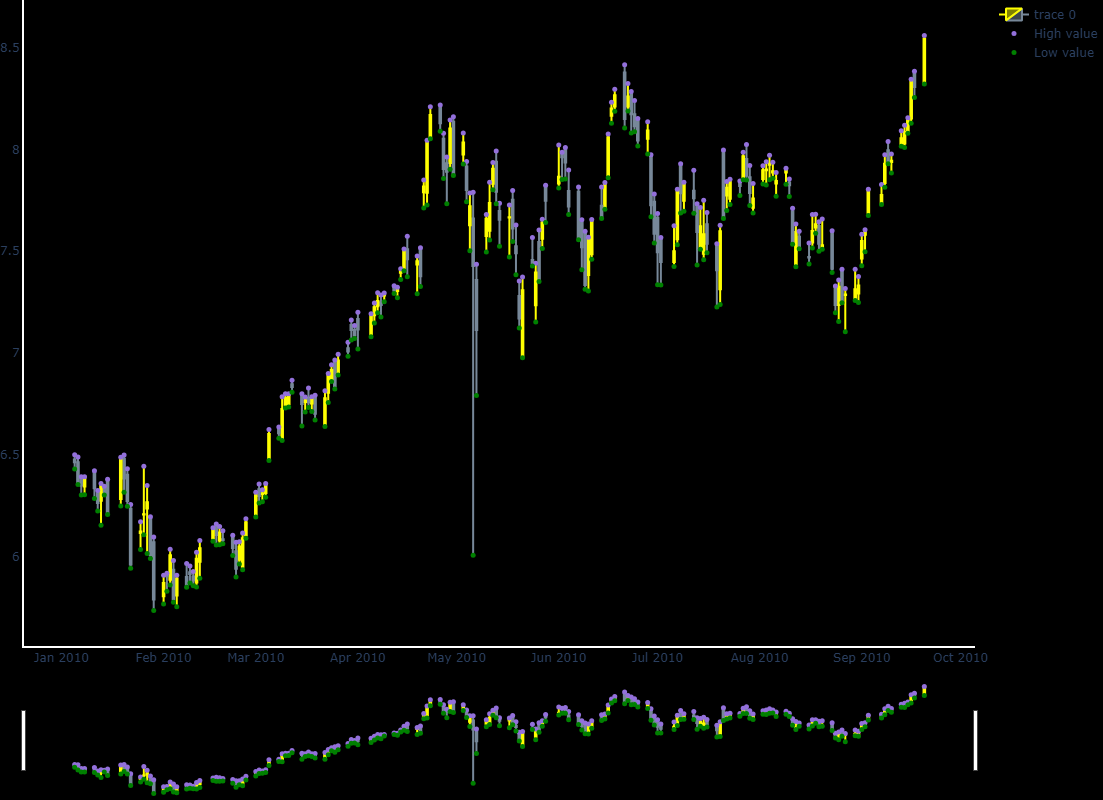

In [21]:
#visualize data using candlestick last six month of data range 6 to 8
stock_data1=stock_data[-180:-1]   #fetch the data for last six months

fig=go.Figure(data=[go.Candlestick(x=stock_data1.index,open=stock_data1["Open"],
                                  high=stock_data1["High"],
                                  low=stock_data1["Low"],
                                  close=stock_data1["Close"],
                                 increasing_line_color="yellow",decreasing_line_color="lightslategray"),
                         go.Scatter(x=stock_data1.index,y=stock_data1.High,mode="markers",marker=dict(size=5,color="MediumPurple"),name="High value"),
                           go.Scatter(x=stock_data1.index,y=stock_data1.Low,mode="markers",marker=dict(size=5,color="green"),name="Low value")] )
#set the background color
fig.update_layout(paper_bgcolor="black",plot_bgcolor="black",margin_l=0,margin_b=0,margin_r=0,margin_t=0,width=1200,height=800)
fig.update_xaxes(showline=True,linewidth=2,linecolor="white",gridcolor="black")
fig.update_yaxes(showline=True,linewidth=2,linecolor="white",gridcolor="black")
fig.show()

# Purple color-Indicates High values in the last six month stock market
#Green color-Indicates Low values in the last six month stock market
#Yellow color-Indicates Increasing values in the last six month stock market
#Grey color-Indicates Decreasing values in the last six month stock market


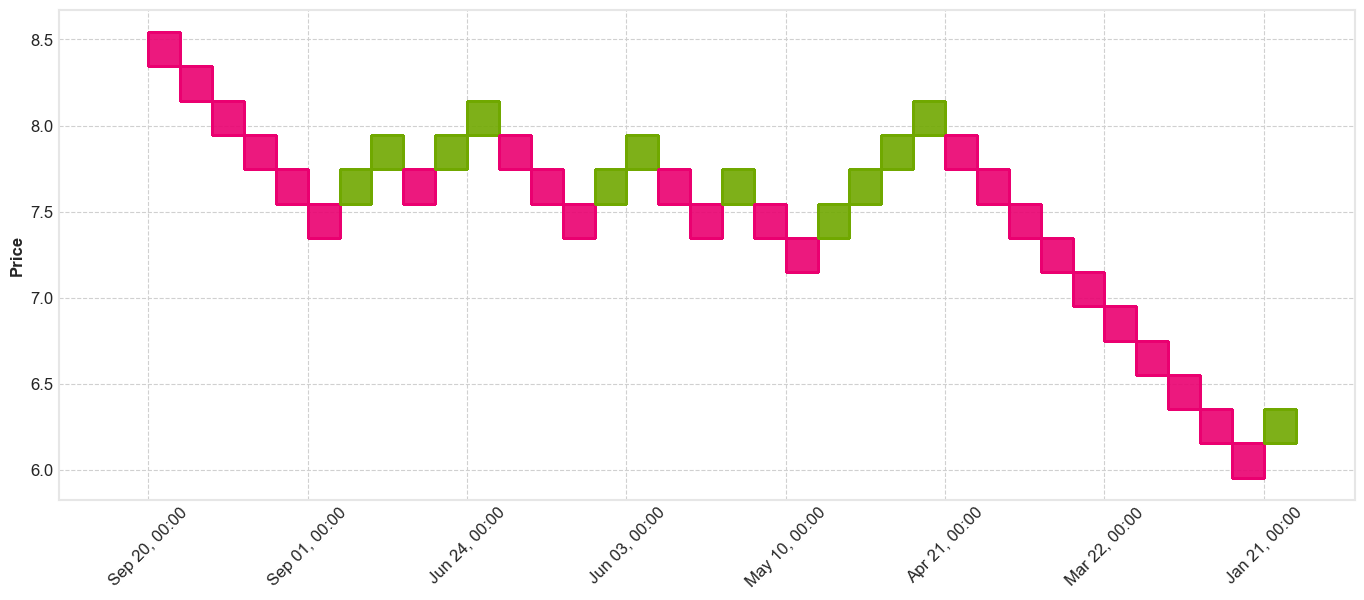

In [23]:
#ranko chart 
#plot based on price
#Green bricks significance uptrend
#Pink bricks significance downtrend
mpf.plot(stock_data1,type="renko",style="binance",figsize=(18,7))


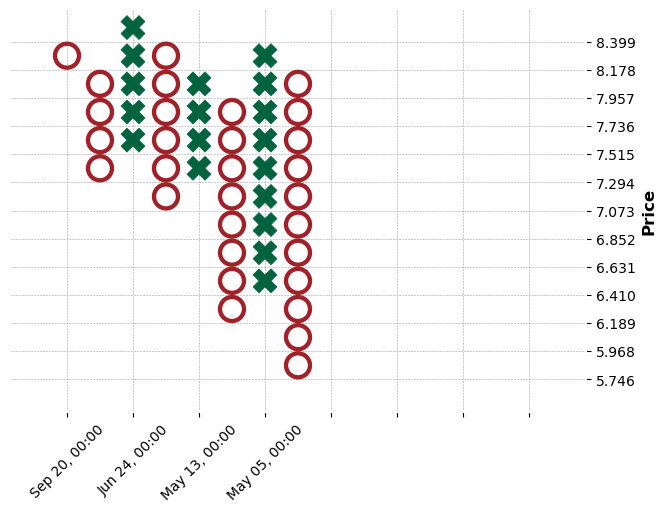

In [25]:
#plot pnf (point and figure)chart
#It denotes price against direction
#x indicates prices rises
#o indicates prices falls
import warnings
warnings.filterwarnings('ignore')
mpf.plot(stock_data1,type="pnf",style="charles")

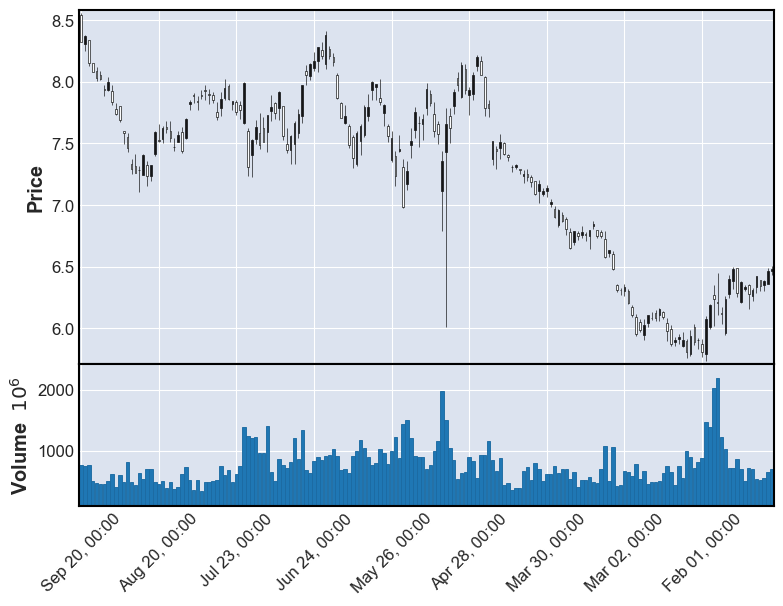

In [27]:
#adding trading volume
mpf.plot(stock_data1,type="candle",volume=True,tight_layout=True)

In [29]:
#In May 26, the volume increses but the price decreases
#In Apr 28, there is volume decreases but thr price increases when compared to jun 03.

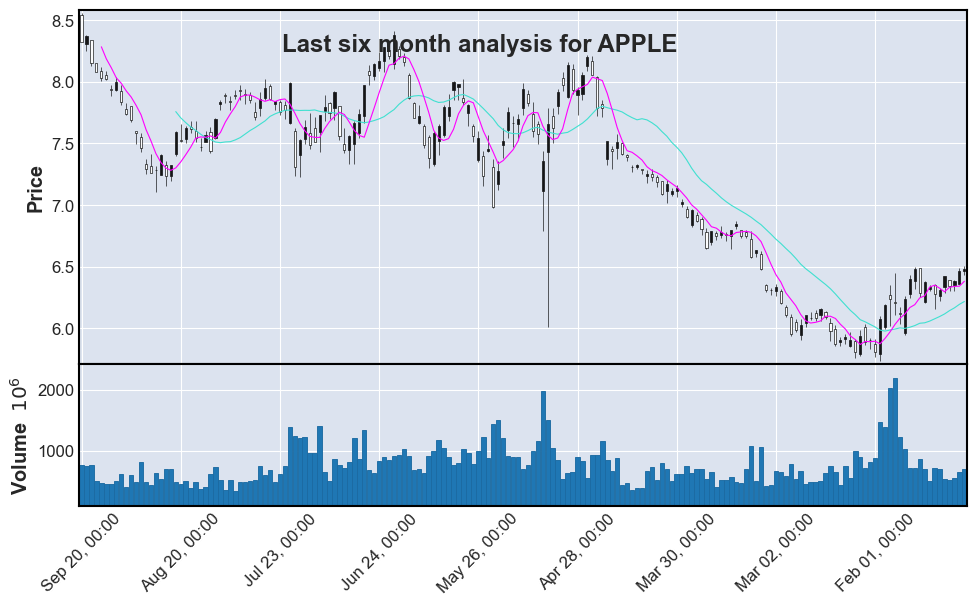

In [31]:
#Adding moving average
#pink color shows friday(5th day) of each week average
#blue color shows every 20th day of month average
mpf.plot(stock_data1,type="candle",volume=True,mav=(20,5),title="Last six month analysis for APPLE",tight_layout=True,figratio=(16,9))

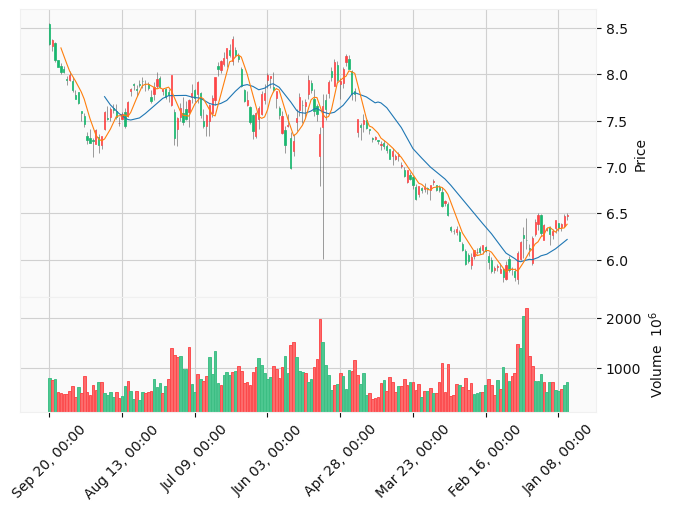

In [33]:
#using custom style
mpf.plot(stock_data1,type="candle",volume=True,mav=(20,5),style="yahoo")

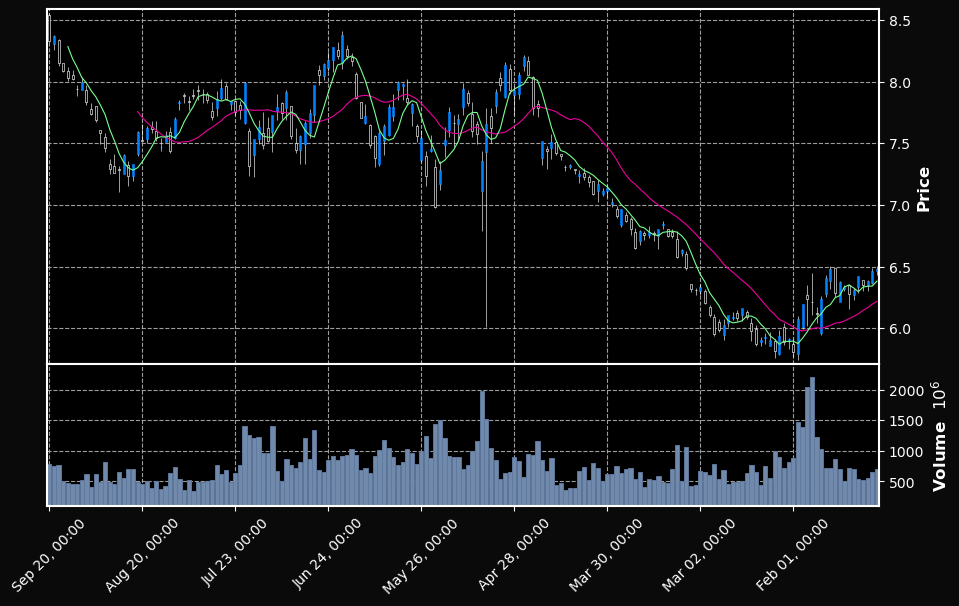

In [35]:
mpf.plot(stock_data1,type="candle",volume=True,mav=(20,5),figratio=(10,6),tight_layout=True,style="mike")

In [9]:
data_new=stock_data.copy()

In [11]:
data_new=stock_data.sort_index()
print(data_new)

                 Open       High        Low      Close        Volume
Date                                                                
2010-01-04    6.43902    6.46922    6.40573    6.45451  5.819111e+08
2010-01-05    6.47811    6.50241    6.43181    6.46558  7.121486e+08
2010-01-06    6.46558    6.49137    6.35574    6.36237  6.513684e+08
2010-01-07    6.38439    6.39407    6.30478    6.35113  5.641458e+08
2010-01-08    6.34617    6.39407    6.30527    6.39387  5.296205e+08
...               ...        ...        ...        ...           ...
2024-10-04  227.90000  228.00000  224.13000  226.80000  3.734510e+07
2024-10-07  224.50000  225.69000  221.33000  221.69000  3.950535e+07
2024-10-08  224.30000  225.98000  223.25000  225.77000  3.185569e+07
2024-10-09  225.23000  229.75000  224.83000  229.54000  3.359109e+07
2024-10-10  227.78000  229.50000  227.17000  229.04000  2.818354e+07

[3718 rows x 5 columns]


In [13]:
#select the target variables(y=close)
data=data_new.filter(["Close"])
print(data.head(5))
# convert the dataframe into numpy array
dataset=data.values

              Close
Date               
2010-01-04  6.45451
2010-01-05  6.46558
2010-01-06  6.36237
2010-01-07  6.35113
2010-01-08  6.39387


In [15]:
#Select the train model 80 percent
training_data_len=math.ceil(len(dataset)*.8)
print("The length of the training model",end=" ")
print(training_data_len)

The length of the training model 2975


In [17]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
print(scaled_data)

[[0.00289609]
 [0.00294448]
 [0.0024933 ]
 ...
 [0.96162303]
 [0.9781034 ]
 [0.97591768]]


In [19]:
#create the train data set
train_data=scaled_data[0:training_data_len , :]
print(train_data)
#split the data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[[0.00289609]
 [0.00294448]
 [0.0024933 ]
 ...
 [0.61393967]
 [0.61372109]
 [0.61666308]]
[array([2.89608637e-03, 2.94447833e-03, 2.49330086e-03, 2.44416575e-03,
       2.63100157e-03, 2.38279058e-03, 2.06804610e-03, 2.45142236e-03,
       2.29037810e-03, 1.82840315e-03, 3.03295650e-03, 2.59607368e-03,
       2.11114860e-03, 7.50272156e-04, 1.45529979e-03, 1.82927744e-03,
       2.08614390e-03, 9.54943497e-04, 8.30575713e-07, 3.54786973e-04,
       5.00268866e-04, 9.46288024e-04, 0.00000000e+00, 4.49822320e-04,
       2.74964275e-04, 5.46912250e-04, 4.07943818e-04, 8.74202795e-04,
       1.09788995e-03, 1.49722201e-03, 1.38417628e-03, 1.43593426e-03,
       1.26842026e-03, 1.10309198e-03, 6.61356840e-04, 1.13762644e-03,
       1.31204734e-03, 1.65699855e-03, 2.23424867e-03, 2.21785573e-03,
       2.27826918e-03, 2.45876640e-03, 3.54725773e-03, 3.56448124e-03,
       4.08223591e-03, 4.32476402e-03, 4.41201819e-03, 4.55579521e-03,
       4.19139105e-03, 4.27086403e-03, 4.22548837e-03, 4.

In [21]:
#convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)


In [23]:
#reshape the train data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2915, 60, 1)

In [25]:
#Build the LSTM model
import warnings
warnings.filterwarnings("ignore")
model=Sequential()
#input layers
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dropout(0.5))
#output layer
model.add(Dense(units=1,activation="linear"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#compile the model
model.compile(optimizer="adam",loss="mean_squared_error",metrics=["RootMeanSquaredError"])

In [29]:
#early stopping condition
early_stopping=EarlyStopping(monitor="val_loss",
                             patience=10,
                             restore_best_weights=True)

In [31]:
#create the text data
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [33]:
#convert the data to a numpy array
x_test=np.array(x_test)

In [35]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [37]:
#Train the model
model.fit(x_train,y_train,batch_size=100,epochs=10,callbacks=[early_stopping])

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step - RootMeanSquaredError: 0.1310 - loss: 0.0183
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - RootMeanSquaredError: 0.0479 - loss: 0.0023
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - RootMeanSquaredError: 0.0429 - loss: 0.0018
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - RootMeanSquaredError: 0.0373 - loss: 0.0014
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - RootMeanSquaredError: 0.0421 - loss: 0.0018
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - RootMeanSquaredError: 0.0341 - loss: 0.0012
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - RootMeanSquaredError: 0.0349 - loss: 0.0012
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - RootMeanSquaredError: 0.0346 - loss: 0.0012
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - RootMeanSquaredError: 0.0328 - loss: 0.0011
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - RootMeanSquaredError: 0.0342 - loss: 0.0012


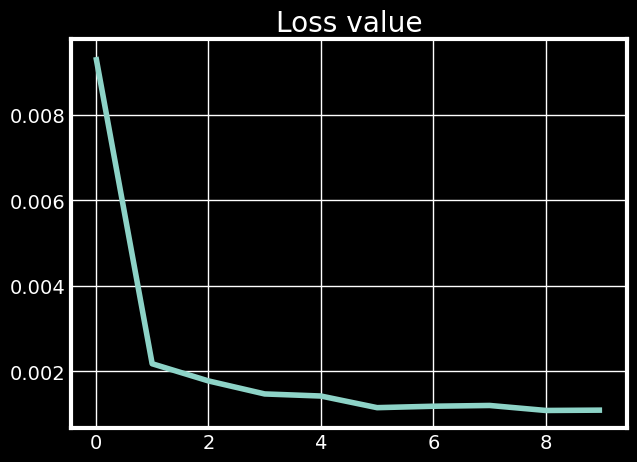

In [39]:
#plot the loss
plt.style.use("dark_background")
loss=model.history.history["loss"]
plt.title("Loss value")
plt.plot(loss)


In [41]:
#Get the models predicted prices values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step


In [42]:
#Get the root mean squared error(RMSE) - evaluate model performance
rmse=np.sqrt(np.mean(predictions-y_test)**2)
print("Root Mean Square Error values",end=" ")
print(rmse)

Root Mean Square Error values 3.201918134358175


In [45]:
#plot the data
import warnings
warnings.filterwarnings("ignore")
train=data[0:training_data_len]
valid=data[training_data_len:]
valid["predictions"]=predictions

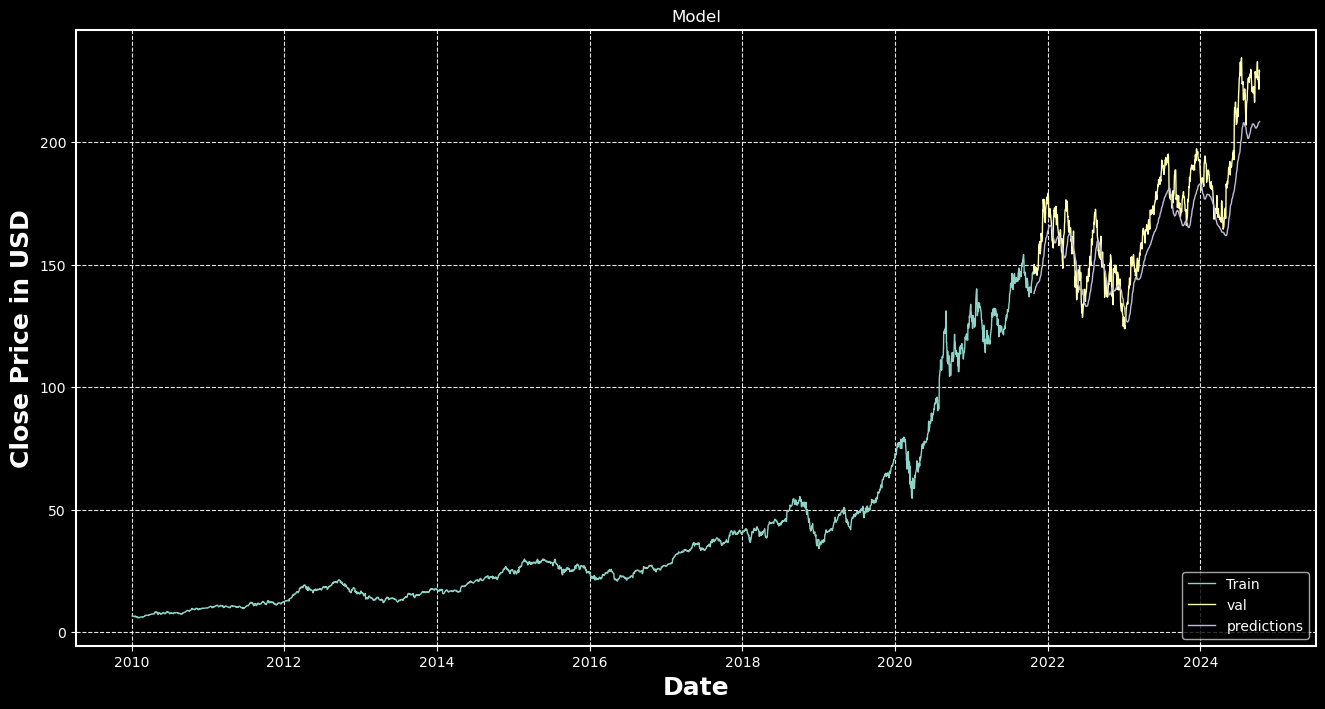

In [75]:
#visualize the data
import matplotlib.pyplot as plt
plt.style.use("dark_background")
plt.figure(figsize=(16,8))
plt.title("Model",color="white")
plt.xlabel("Date",fontsize=18,color="white")
plt.ylabel("Close Price in USD",fontsize=18,color="white")



plt.plot(train["Close"])
plt.plot(valid[["Close","predictions"]])
plt.legend(["Train","val","predictions"],loc="lower right",labelcolor="white")
plt.show()

In [77]:

print(valid.tail(20))

             Close  predictions
Date                           
2024-09-13  222.50   207.116501
2024-09-16  216.32   206.941956
2024-09-17  216.79   206.715103
2024-09-18  220.69   206.429596
2024-09-19  228.87   206.127502
2024-09-20  228.20   205.906998
2024-09-23  226.47   205.799698
2024-09-24  227.37   205.793839
2024-09-25  226.37   205.880844
2024-09-26  227.52   206.035217
2024-09-27  227.79   206.245728
2024-09-30  233.00   206.499756
2024-10-01  226.21   206.829529
2024-10-02  226.78   207.175156
2024-10-03  225.67   207.509262
2024-10-04  226.80   207.805649
2024-10-07  221.69   208.063324
2024-10-08  225.77   208.236725
2024-10-09  229.54   208.350220
2024-10-10  229.04   208.453476


In [79]:
#get the price prediction last 30 days
new_df=data_new.filter(["Close"])
last_30_days=new_df[-30:].values
last_30_days_scaled=scaler.transform(last_30_days)
x1_test=[]
x1_test.append(last_30_days_scaled)
x1_test=np.array(x1_test)
x1_test=np.reshape(x1_test,(x1_test.shape[0],x1_test.shape[1],1))
#get the predicted scaled data
pred_price=model.predict(x1_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print("Pridicted price for last 30 days")
print(pred_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step
Pridicted price for last 30 days
[[207.77281]]


In [81]:
last_sequence=x_test[-1]
last_sequence=last_sequence.reshape(1,60,1)
prediction_next_30_days=[]
for _ in range(30):
    next_day_prediction=model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0,0])
    last_sequence=np.roll(last_sequence,-1,axis=1)
    last_sequence[0,-1,0]
prediction_next_30_days=scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1,1))

print("Prediction for next 30 days")
for i, prediction in enumerate(prediction_next_30_days,start=1):
    print(f"Day{i}: predicted price={prediction[0]}")


    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━